# PRÁCTICA 3.1. INTRODUCCIÓN A PYTORCH

Esta práctica está basada en el [tutorial](https://docs.pytorch.org/tutorials/beginner/nn_tutorial.html) de Jeremy Howard (creador de fast.ai), recomendado para arrancar con PyTorch.

Para esta primera práctica, asumiremos que ya has adquirido los fundamentos teóricos básicos de las redes neuronales artificiales, por lo que nos centraremos en ver cómo plasmar esos conocimientos en código ejecutable mediante PyTorch. 

PyTorch es un framework de código abierto para el aprendizaje profundo (Deep Learning). Destaca por su flexibilidad "Pythónica", su eficiencia en el cálculo de **tensores** (estructuras de datos similares a los arrays de NumPy pero optimizadas para GPU, como veremos en el siguiente módulo) y sus **grafos computacionales** dinámicos. Esta última característica simplifica la depuración y ofrece mayor libertad al construir modelos complejos. Es un proyecto de código abierto desarrollado dentro de la *Linux Foundation*, principalmente por *Meta AI* y grandes aportaciones de otras empresas como *NVIDIA*. 

## 1. ¿Cómo funciona y cómo se instala?

PyTorch provee una serie de módulos y clases que son muy útiles para crear y entrenar redes neuronales, como por ejemplo: [torch.nn](https://pytorch.org/docs/stable/nn.html), [torch.optim](https://pytorch.org/docs/stable/optim.html), [Dataset](https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset) y [DataLoader](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader). Iremos construyendo sobre estas partes poco a poco para ver qué hace cada una.

Pero antes, para instalar PyTorch, la forma más sencilla es visitar su página oficial (pytorch.org). Allí, selecciona tu sistema, gestor de paquetes (pip o conda), versión de Python y, lo más importante, si usarás CPU o GPU (CUDA/ROCm). La web te proporcionará el comando exacto. Si vas a usar una GPU con CUDA, se debe instalar una versión del driver de NVIDIA compatible con la GPU instalada, para ello consulta su [Compute Capability](https://developer.nvidia.com/cuda-gpus) y qué [versión del driver](https://docs.nvidia.com/datacenter/tesla/drivers/index.html) de CUDA lo soporta. Por ahora trabajaremos usando la CPU, y en el próximo módulo veremos cómo usar una GPU.

Alternativamente, puedes usar plataformas en la nube con todo pre-instalado, como por ejemplo las siguientes opciones con versiones gratuitas:

* *Google Colaboratory* (Colab): mejor opción para la mayoría de usuarios, experimentos rápidos, tutoriales, proyectos de portafolio y educación. Ofrece un entorno Jupyter Notebook totalmente gratuito que proporciona acceso a GPUs (Tesla T4, L4 o A100) y TPUs de Google. Se integra bien con Google Drive. La versión gratuita tiene un tiempo límite por sesión (12 horas), y el acceso a una GPU no está garantizado siempre. Existe una versión de pago (Colab Pro/Pro+) que ofrece más recursos y tiempos de ejecución más largos.
* *Kaggle Kernels* (Notebooks de Kaggle): mejor para competiciones de ciencia de datos, aprendizaje, compartir código y colaborar. Ofrece un entorno de Jupyter Notebook que proporciona acceso gratuito a GPUs y CPUs. Kaggle es una plataforma excelente para encontrar datasets y aprender de la comunidad. Por supuesto, tiene una limitación similar a Colab para el tiempo de ejecución y recursos disponibles, aunque las especificaciones pueden variar. 

Una vez instalado, o usando una plataforma en la nube, podemos cargar PyTorch así:


In [1]:
import torch

In [5]:
# Veamos la versión que tenemos disponible
print (torch.__version__)

2.3.0+cu121


## 2. Tensores

Antes de empezar a construir este primer ejemplo, veamos con más detenimiento el concepto de **tensor**. Un tensor es un contenedor de datos, usualmente números. Por ejemplo, una matriz es un tensor de 2 dimensiones. Los tensores son generalizaciones de las matrices a un número arbitrario de dimensiones (el nombre de tensor viene en realidad de la física). En el contexto de tensores, una dimensión se denomina eje (axis).

Un tensor se define por 3 atributos principales:
* Número de ejes o rango (**rank**). Por ejemplo, una matriz o tensor 2D itene 2 ejes.
* Forma (**shape**). Una tupla de enteros que describen cuantas dimensiones tiene el tensor en cada eje. Un escalar tiene un shape igual a (). Una matriz de 3x4 tiene un shape (3, 4).
* Tipo de dato (**dtype**). Es el tipo de dato contenido en el tensor, por ejemplo `float32` (número real de 32 bits), `uint8` (entero sin signo de 8 bits), `float16` (número real de media precisión, 16 bits), etc. Normalmente no hay tensores de cadenas de texto, ya que los tensores viven en segmentos de memoria pre-reservados y contiguos.

Existen varios métodos básicos para crear tensores de un tamaño personalizado:

In [6]:
# tensor con ceros
zeros = torch.zeros(2, 3)
print(zeros)

# tensor con unos
ones = torch.ones(2, 3)
print(ones)

# tensor inicializado aleatoriamente. 
# Podemos fijar una semilla para que simpre sean los mismos:
# torch.manual_seed(1729)
random = torch.rand(2, 3)
print(random)

# crea un tensor con valores predefinidos mediante listas
constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(constants)

# existen versiones de los métodos anteriores pero con _like
# para indicar que queremos un tensor con la misma forma que otro
constants_zeros = torch.zeros_like(constants)
constants.shape == constants_zeros.shape

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.3948, 0.3103, 0.5273],
        [0.5953, 0.0451, 0.9951]])
tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])


True

**Ejercicio:** crea a continuación un tensor con rango 3 y forma (2,3,2), y observa cómo se distribuyen los datos.

También podemos hacer operaciones aritméticas y lógicas con tensores y escalares, y con tensores y tensores.

In [9]:
# Sumar un escalar
ones = torch.zeros(2, 3) + 1
# Multiplicar un escalar
twos = torch.ones(2, 3) * 2
# Combinación
threes = (torch.ones(2, 3) * 7 - 1) / 2
# Potencias
fours = twos ** 2
sqrt2s = twos ** 0.5

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)

# Suma de tensores
fives = ones + fours
print(fives)

# Traspuesta de un tensor
twos_T = twos.T
print (twos_T)

# Multiplicación matricial
sixes = ones @ twos_T
print (sixes)

# Multiplicación elemento a elemento
dozens = threes * fours
print(dozens)

# Potencia con tensores (por elemento)
powers2 = twos ** torch.tensor([[1, 2, 3], [4, 5, 6]])
print(powers2)



tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
tensor([[4., 4., 4.],
        [4., 4., 4.]])
tensor([[1.4142, 1.4142, 1.4142],
        [1.4142, 1.4142, 1.4142]])
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[6., 6.],
        [6., 6.]])
tensor([[12., 12., 12.],
        [12., 12., 12.]])
tensor([[ 2.,  4.,  8.],
        [16., 32., 64.]])


## 3. Descarga de los datos MNIST

Para este primer ejemplo, vamos a usar el dataset clásico [MNIST](https://yann.lecun.com/exdb/mnist/index.html), que consiste en 70.000 imágenes en blanco y negro de dígitos escritos a mano (entre 0 y 9). 

Usaremos [pathlib](https://docs.python.org/3/library/pathlib.html) para usar rutas y la descarga la haremos con [requests](http://docs.python-requests.org/en/master/). 


In [2]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)  # creamos la carpeta

URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists(): # evitamos descargar si ya se ha descargado
        content = requests.get(URL + FILENAME).content  # descargamos el fichero
        (PATH / FILENAME).open("wb").write(content)

Este dataset está en formato **array de numpy**, y se ha guardado usando **pickle**, un formato específico de python para serializar datos. Normalmente usamos `X` para denominar los ejemplos (en este caso, las imágenes), e `Y` para las etiquetas (los números a los que corresponde cada imagen). El dataset también viene ya particionado en 50.000 imágenes para train, 10.000 para validación y 10.000 para test. A continuación descomprimimos el dataset (estaba en formato .gz) y de-serializamos los datos solo para train y valid (por ahora dejaremos fuera a test).

In [9]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:  # descomprimimos el fichero en f
        ((x_train_np, y_train_np), (x_valid_np, y_valid_np), _) = pickle.load(f, encoding="latin-1") # cargamos los datos serializados 

In [10]:
x_train_np.shape

(50000, 784)

In [11]:
x_valid_np.shape

(10000, 784)

Como puedes ver, hemos cargado una matriz de 50.000 filas (cada imagen) con 784 columnas (pixeles de cada imagen). Esto es así porque cada imagen es una matriz de 28 x 28 pixeles, y se almacena de forma aplanada (`flattened`, es decir, por filas) con 28x28=784 elementos en total. Veamos la primera imagen (fila 0).

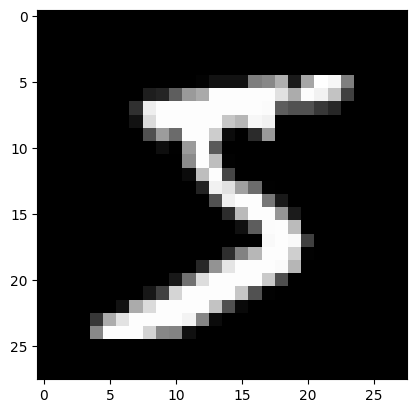

In [12]:
from matplotlib import pyplot
import numpy as np

# Necesitamos cambiar la forma de la matriz a 28x28
pyplot.imshow(x_train_np[0].reshape((28, 28)), cmap="gray")
try:
    import google.colab  # si estamos en google colab, no es necesario la siguiente línea
except ImportError:
    pyplot.show()

El número mostrado en la imagen parece un 5, comprobemos que es así consultando su etiqueta:

In [13]:
y_train_np[0]

5

**Ejercicio:** Prueba a visualizar otras imágenes del conjunto de entrenamiento, así como del conjunto de validación (`x_valid`), en la siguiente celda:

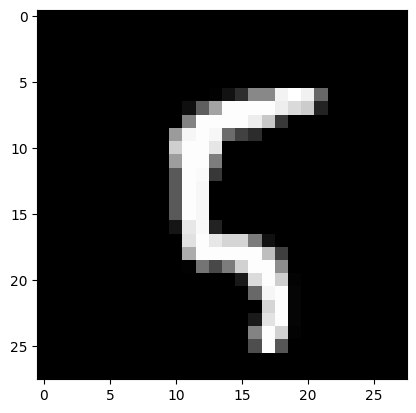

El número corresponde a un  tensor(5)


In [14]:
## EJERCICIO

x_ej1 = x_train_np  # 1. cambia x_train_np por x_valid_np
y_ej1 = y_train_np  # 2. cambia y_train_np por y_valid_np
img_ej1 = 100    # 3. cambia el número por otro

pyplot.imshow(x_ej1[img_ej1].reshape((28, 28)), cmap="gray") 
try:
    import google.colab 
except ImportError:
    pyplot.show()
    
print('El número corresponde a un ', y_train[img_ej1])

PyTorch usa para los tensores el tipo de dato `torch.tensor` en vez de arrays de numpy, así que necesitamos convertir los datos a este formato.

In [15]:
import torch

# map equivale a realizar un bucle que recorra los elementos
x_train, y_train, x_valid, y_valid = map(  
    torch.tensor, (x_train_np, y_train_np, x_valid_np, y_valid_np)
)


In [16]:
n, c = x_train.shape
# previsualizamos el tensor x_train (no será completo)
print(x_train)
# La forma del tensor
print(x_train.shape)
# El tipo de dato en el tensor
print(x_train.dtype)
# Previsualizamos Y_train
print(y_train)
# Con .item() sacamos el valor de un tensor (mira la diferencia entre min y max)
print('El valor mínimo y máximo de las etiquetas son ',y_train.min(), ' y ', y_train.max().item())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([50000, 784])
torch.float32
tensor([5, 0, 4,  ..., 8, 4, 8])
El valor mínimo y máximo de las etiquetas son  tensor(0)  y  9


## 4. Primera red neuronal hecha a mano

### 4.1. Definición del modelo
Vamos a hacer un primer modelo lineal en Pytorch con simples operaciones tensoriales, usando tensores para representar los pesos `weights` y el bias `bias`: `y_hat = X*weights+bias`, donde `y_hat` será la predicción de la variable `Y`.

Ahora vamos a añadir algo nuevo, vamos a indicar a PyTorch hay que calcular gradientes en los tensores, con `requires_grad`. Esto hará que PyTorch grabe todas las operaciones que se hagan sobre ese tensor, para que después podamos hacer la retro-propagación de forma automática. Observa a continuación que:

* para los pesos, indicamos `requires_grad` después de inicializarlo, ya que no queremos que ese paso (la división por la raíz cuadrada de 784) se registre en el gradiente. En PyTorch, añadir un `_` al final del nombre de la función indica que la operación modifica los valores de la variable.
* para el bias sí que podemos indicar `requires_grad` en el momento de inicializarlo.



In [18]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

**Ejercicio**: ¿Qué tipo de inicialización estamos haciendo a los pesos?
<details>
<summary>Click aquí para ver solución</summary>
    Estamos haciendo la inicialización Xavier, ya que multiplicamos por `1/sqrt(n)`, con `n` el número de conexiones de entrada.
</details>

### 4.2. Función de activación en capa de salida
PyTorch se integra perfectamente con Python, de tal forma que podemos usar cualquier función estándar de este lenguaje (o un objeto "callable") como un modelo, ya que los gradientes se computan automáticamente. Teniendo esto en cuenta, vamos a definir:
* la función de activación **[log softmax](https://www.baeldung.com/cs/softmax-vs-log-softmax)**, que es una variante de **softmax** pero con una mejor estabilidad numérica (en cuestión de precisión decimal). La fórmula la podemos escribir:
$$
\text{log\_softmax}(x_i) = \log(\text{softmax}(x_i)) = \log\left(\frac{\exp(x_i)}{\sum_j \exp(x_j)}\right) = x_i - \log\left(\sum_j \exp(x_j)\right)
$$
Otra forma de verlo es como `log_softmax (x_i) = x_i - log(sum(exp(x_j)))`. Es decir, para cada valor `x_i` le restamos el log de la suma de todos los valores x_j. Aunque estas funciones de activación ya existen en PyTorch, esto demuestra que implementarlos a mano también es posible y es eficiente, ya que automáticamente se creará una versión compilable.
* el modelo lineal es la multiplicación de matrices (operador `@`) entre la entrada y los pesos, más el bias.


In [19]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

**Ejercicio opcional**: Puedes entender cómo se implementa log_softmax con `x.exp().sum(-1).log().unsqueeze(-1)` si vas añadiendo cada operación una a una sobre un tensor simple. Ejecútalo a continuación y comenta al lado de cada línea que ha hecho:

In [27]:
## EJERCICIO
sample = torch.tensor([[1,1,1],[2,2,2]])

print(sample)  # el vector de entrada
print(sample.exp())   # Aplica e^x para cada valor x en samples
print(sample.exp().sum(-1))   # ...
print(sample.exp().sum(-1).log())   # ...
print(sample.exp().sum(-1).log().unsqueeze(-1))    #...

tensor([[1, 1, 1],
        [2, 2, 2]])
tensor([[2.7183, 2.7183, 2.7183],
        [7.3891, 7.3891, 7.3891]])
tensor([ 8.1548, 22.1672])
tensor([2.0986, 3.0986])
tensor([[2.0986],
        [3.0986]])


Vamos a usar el modelo para hacer inferencia sobre un batch de 64 elementos. Por ahora, las predicciones serán aleatorias.

In [22]:
batch = 64  # batch size

xb = x_train[0:batch]  # a mini-batch from x
preds = model(xb)  # predictions
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.4225, -2.6129, -2.4560, -2.0440, -1.8490, -2.6357, -2.2152, -2.4246,
        -2.2567, -2.3937], grad_fn=<SelectBackward0>) torch.Size([64, 10])


El tensor resultado de la predicción, `preds`, contiene también una función de gradiente (`grad_fn`). Esta función se utilizará para realizar la retropropagación.

### 4.3. Función de pérdida y métrica de evaluación

A continuación vamos a implementar la función de pérdida *logaritmo-verosimilitud negativa* (NLL, o negative log-likelihood), la cual se deriva fácilmente de la fórmula vista en clase para clasificación multiclase, asumiendo que solo puede haber una clase válida para cada ejemplo. La fórmula es:

$$
\ell(x, y) = \text{media}(\{l_1, \dots, l_N\}), \quad l_i = -x_{i,y_i}
$$

donde
* N es el número de ejemplos (e.g. tamaño del batch)
* y es un tensor con N elementos, con valores entre 0 y C-1.
* x es un tensor de rango 2, con N filas y C columnas, donde:
    * cada fila es el valor predicho por el modelo para cada ejemplo, que consiste en un vector de C valores, uno por cada clase.
    * asumimos que **a cada fila de x le hemos aplicado log_softmax**.
    * x_{i,j} es el valor en la fila i y columna j


In [69]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

Hagamos una prueba rápida con el primer batch. Esto mejorará cuando entrenemos el modelo, recuerda que buscaremos reducir el valor:

In [70]:
yb = y_train[0:batch]
print(loss_func(preds, yb))

tensor(2.3143, grad_fn=<NegBackward0>)


En PyTorch tenemos que definir nuestra propia función de accuracy, el cual nos dará un valor más interpetable para nosotros, pero que no serviría para entrenar un modelo. Será la suma ponderada de las veces que el modelo acierta a la hora de predecir la clase de un ejemplo:

In [71]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

print(accuracy(preds, yb))

tensor(0.1094)


Efectivamente, al ser un modelo aleatorio, y al haber 10 clases, esperamos obtener alrededor de un 1/10 = 0.10 = 10% de precisión. Esto se conoce como el "random baseline". Vamos a mejorarlo entrenando el modelo.

### 4.4. Bucle de entrenamiento
A continuación verás un bucle donde aplicaremos las épocas, de la siguiente forma:
* seleccionamos un mini-batch de tamaño `bs`
* usamos el modelo para hacer predicciones
* calculamos la pérdida
* `loss.backward()` actualizará los gradientes del modelo (de `weights` y de `bias`). Si te lo preguntas, la función loss sabe cómo hacerlo porque lo hace a través de las predicciones que el modelo ha generado, cuyos gradientes ya vienen enlazados con los parámetros del modelo (como dijimos al comenzar esta sección).
* Usamos los gradientes para actualizar los parámetros (`weights` y `bias`). Est aactualización no debe registrarse como operaciones a registrar para propagación de gradientes, por lo que usamos el contexto `torch.no_grad()`.
* Finalmente, reiniciamos los gradientes a cero con `.grad.zero_()` para la siguiente iteración. Si no se hace esto, estaríamos siempre acumulando los gradientes entre las iteraciones.


In [72]:
from IPython.core.debugger import set_trace

lr = 0.5  # learning rate
epochs = 2  # cuántas épocas

for epoch in range(epochs):  # bucle para cada época
    for i in range((n - 1) // bs + 1):   # bucle para cada mini-batch
        #         set_trace()
        start_i = i * bs       # donde empieza el mini-batch
        end_i = start_i + bs   # donde finaliza el mini-batch
        xb = x_train[start_i:end_i]  # extraemos ejemplos
        yb = y_train[start_i:end_i]  # extraemos etiquetas
        pred = model(xb)             # el modelo genera predicciones
        loss = loss_func(pred, yb)   # calculamos la pérdida

        loss.backward()              # retro-propagamos los gradientes
        with torch.no_grad():        # actualizamos pesos (no registramos gradientes!)
            weights -= weights.grad * lr    # regla de actualización simple, sin momentum
            bias -= bias.grad * lr
            weights.grad.zero_()     # reseteamos los gradientes a cero
            bias.grad.zero_()

In [73]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0804, grad_fn=<NegBackward0>) tensor(1.)


Vemos como han mejorado los valores, la pérdida ha bajado y el modelo obtiene una precisión perfecta.

## 5. Creación de la red neuronal con elementos de PyTorch

Ahora vamos a simplificar el código anterior significativamente usando elementos que ya nos proporciona PyTorch.

nn.Module

nn.linear